In [2]:
import numpy as np
import pandas as pd
import warnings  
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the dataset

In [3]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# Preprocessing the dataset

In [4]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [5]:
avg = data['bmi'].mean()
avg

28.893236911794673

In [6]:
data.bmi=(data.bmi.fillna(28.74))

In [7]:
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [8]:
data.info() # THIS FUNCTION LETS US KNOW WHAT DATA TYPE VARIABLE ARE PROVIDED IN THE DATASET

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [9]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.887209,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.698075,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


<AxesSubplot:xlabel='work_type', ylabel='count'>

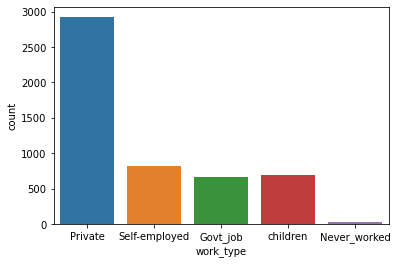

In [10]:
sns.countplot(data['work_type'])

<AxesSubplot:xlabel='Residence_type', ylabel='count'>

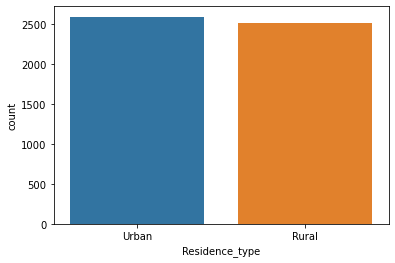

In [11]:
sns.countplot(data['Residence_type'])

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

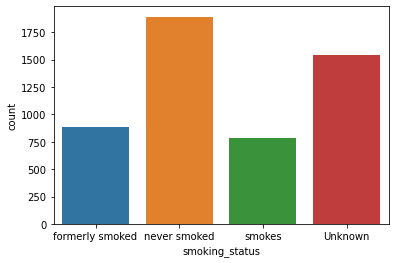

In [12]:
sns.countplot(data['smoking_status'])

<AxesSubplot:xlabel='stroke', ylabel='count'>

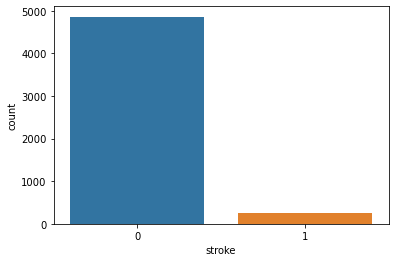

In [13]:
sns.countplot(data['stroke'])

<AxesSubplot:xlabel='ever_married', ylabel='count'>

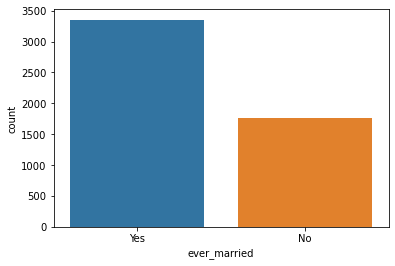

In [14]:
sns.countplot(data['ever_married'])

In [15]:
min_avg_glucose_level = min(data.avg_glucose_level)
max_avg_glucose_level = max(data.avg_glucose_level)
print(min_avg_glucose_level)
print(max_avg_glucose_level)

55.12
271.74


<AxesSubplot:xlabel='age', ylabel='Density'>

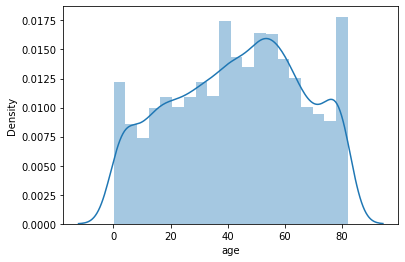

In [16]:
sns.distplot(data['age'])

<AxesSubplot:xlabel='avg_glucose_level', ylabel='Density'>

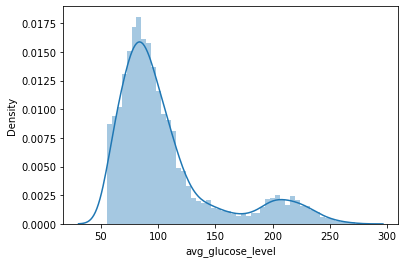

In [17]:
sns.distplot(data['avg_glucose_level'])

In [18]:
data['work_type'] = data['work_type'].map({'Private':0, 'Self-employed': 1, 'Govt_job':2, 'children':3, 'Never_worked':4})

In [19]:
data['gender'] = data['gender'].map({'Male':0, 'Female':1})
data['Residence_type'] = data['Residence_type'].map({'Urban':0, 'Rural':1})
data['smoking_status'] = data['smoking_status'].map({'formerly smoked':0, 'never smoked':1, 'smokes':2, 'Unknown':3})
data['ever_married'] = data['ever_married'].map({'Yes':0, 'No':1})

In [21]:
# dataset after mapping the values
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0.0,67.0,0,1,0,0,0,228.69,36.60,0,1
1,51676,1.0,61.0,0,0,0,1,1,202.21,28.74,1,1
2,31112,0.0,80.0,0,1,0,0,1,105.92,32.50,1,1
3,60182,1.0,49.0,0,0,0,0,0,171.23,34.40,2,1
4,1665,1.0,79.0,1,0,0,1,1,174.12,24.00,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,1.0,80.0,1,0,0,0,0,83.75,28.74,1,0
5106,44873,1.0,81.0,0,0,0,1,0,125.20,40.00,1,0
5107,19723,1.0,35.0,0,0,0,1,1,82.99,30.60,1,0
5108,37544,0.0,51.0,0,0,0,0,1,166.29,25.60,0,0


<AxesSubplot:>

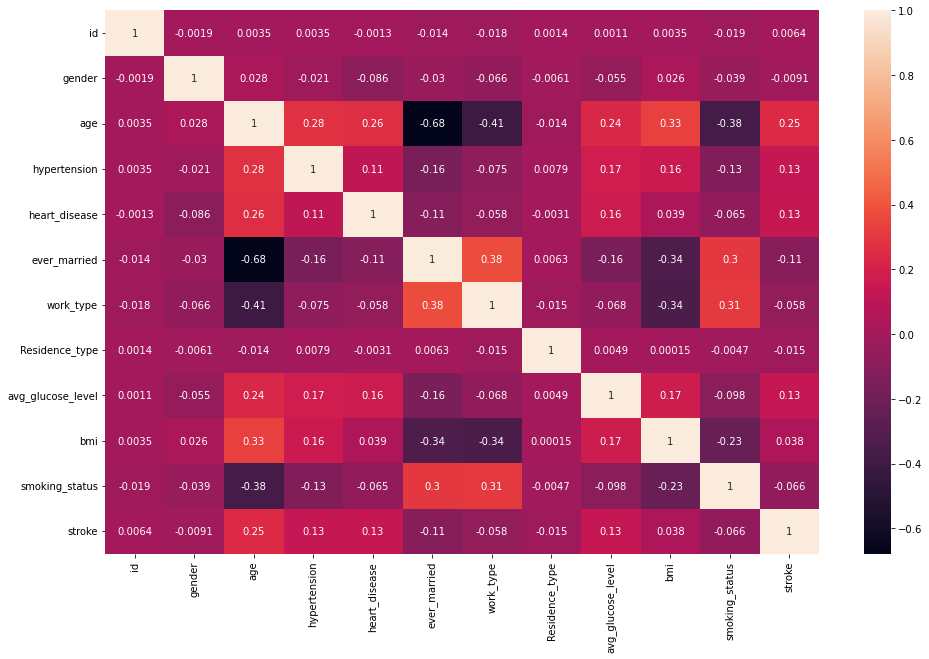

In [22]:
# correlation heatmap to check for any correlations
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(method='pearson'), annot=True)

<AxesSubplot:xlabel='age', ylabel='avg_glucose_level'>

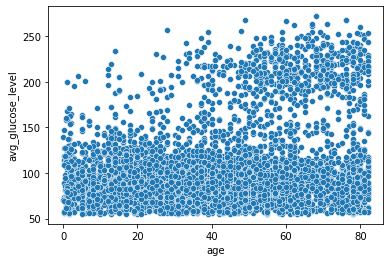

In [23]:
sns.scatterplot(x=data['age'], y=data['avg_glucose_level'])

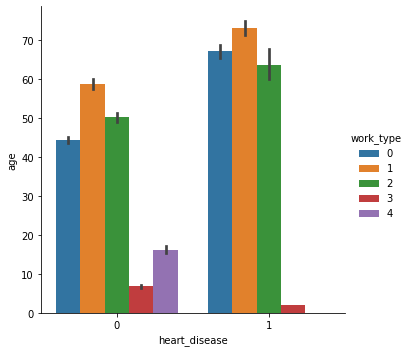

In [24]:
sns.catplot(x='heart_disease',y='age', hue="work_type", kind="bar", data=data)

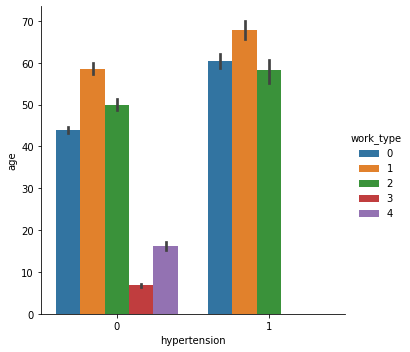

In [25]:
sns.catplot(x='hypertension',y='age', hue="work_type", kind="bar", data=data)

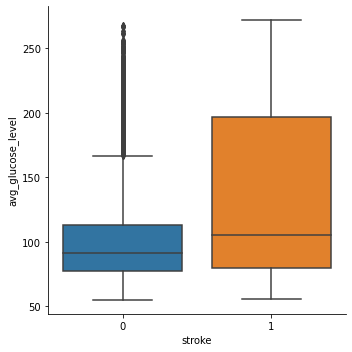

In [26]:
sns.catplot(x='stroke', y="avg_glucose_level", kind="box", data=data)

# Applying the algorithm

In [28]:
features = ['id','age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'gender',
 'work_type',
 'smoking_status']

label = ['stroke']

X = data[features]
y = data[label]

In [29]:
X.isnull().sum() #WE STILL HAVE 1 NULL VALUE IN THE GENDER COLUMN

id                   0
age                  0
hypertension         0
heart_disease        0
ever_married         0
Residence_type       0
avg_glucose_level    0
bmi                  0
gender               1
work_type            0
smoking_status       0
dtype: int64

In [30]:
X.gender=(X.gender.fillna(1))

In [31]:
X.isnull().sum()

id                   0
age                  0
hypertension         0
heart_disease        0
ever_married         0
Residence_type       0
avg_glucose_level    0
bmi                  0
gender               0
work_type            0
smoking_status       0
dtype: int64

In [33]:
from imblearn.over_sampling import SMOTE #balance the class distribution

smote = SMOTE() #Synthetic Minority Over-sampling Technique
x_smote, y_smote = smote.fit_resample(X, y)

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test=train_test_split(x_smote,y_smote,test_size=0.33,random_state=42) #3parts devide
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [35]:
testing = X_test['id'] #taking ID column for the purpose of submission
testing

315     41940
534     71808
1427     5984
9125    25066
6025     2229
        ...  
3065    46455
8270    33116
6574     7703
2487    44325
620     34558
Name: id, Length: 1605, dtype: int64

In [36]:
# AS ID COLUMN DOES NOT AFFETCT THE MODEL'S PERFORMANCE, WE DROP IT

In [37]:
X_train = X_train.drop(columns=['id'])
X_test = X_test.drop(columns=['id'])

In [38]:
from sklearn.preprocessing import StandardScaler #feature means caluclate and subtract
sc=StandardScaler()

X_train = sc.fit_transform(X_train) #stores the splitting value
X_test = sc.transform(X_test)

In [39]:
X_train

array([[-0.04653048, -0.31236726, -0.21858619, ...,  0.93804764,
        -0.61395651,  0.72423603],
       [ 0.38631963, -0.31236726, -0.21858619, ..., -0.70209388,
        -0.61395651, -0.23371467],
       [ 0.61743792, -0.31236726, -0.21858619, ...,  0.88645602,
        -0.61395651,  0.72423603],
       ...,
       [ 0.53907829, -0.31236726, -0.21858619, ...,  0.93804764,
         1.55688972,  0.72423603],
       [-0.41789548, -0.31236726, -0.21858619, ...,  0.93804764,
        -0.61395651,  0.72423603],
       [ 0.24285775, -0.31236726, -0.21858619, ...,  0.93804764,
        -0.61395651,  0.72423603]])

In [40]:
X_test

array([[ 0.09273139, -0.31236726,  4.57485442, ..., -1.27322057,
        -0.61395651, -1.19166538],
       [-1.62483173, -0.31236726, -0.21858619, ...,  0.93804764,
        -0.61395651,  1.68218674],
       [-1.3927286 , -0.31236726, -0.21858619, ..., -1.27322057,
        -0.61395651,  0.72423603],
       ...,
       [ 0.62073796, -0.31236726, -0.21858619, ..., -1.27322057,
        -0.61395651,  0.72423603],
       [ 1.06756451, -0.31236726, -0.21858619, ..., -1.27322057,
         0.47146661,  0.72423603],
       [-1.02136361, -0.31236726, -0.21858619, ..., -1.27322057,
        -0.61395651, -0.23371467]])

# APPLY LOGISTIC REGRESSION

In [41]:
from sklearn.linear_model import LogisticRegression #scikitlearn library
log_reg = LogisticRegression() #train the logistic regression
log_reg.fit(X_train,y_train)

LogisticRegression()

In [42]:
y_pred_log_reg = log_reg.predict(X_test) #trained logistic value
y_pred_log_reg

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [43]:
from sklearn.metrics import f1_score, roc_auc_score,accuracy_score,confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, classification_report 
classification_report = classification_report(y_test, y_pred_log_reg) #takes true labels of ytest
print(classification_report)

              precision    recall  f1-score   support

           0       0.86      0.78      0.82       803
           1       0.80      0.87      0.83       802

    accuracy                           0.82      1605
   macro avg       0.83      0.82      0.82      1605
weighted avg       0.83      0.82      0.82      1605



In [44]:
auc = roc_auc_score(y_test, y_pred_log_reg)
auc 

0.8249503886609753

In [45]:
cm = confusion_matrix(y_test, y_pred_log_reg)
cm

array([[626, 177],
       [104, 698]], dtype=int64)

In [46]:
predicted_probab_log = log_reg.predict_proba(X_test)
predicted_probab_log = predicted_probab_log[:, 1]
fpr, tpr, _ = roc_curve(y_test, predicted_probab_log)

# ROC Curve

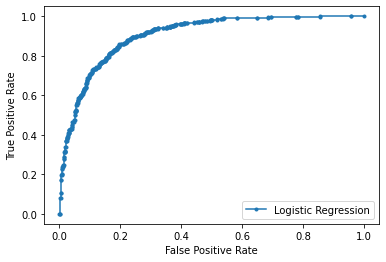

In [47]:
from matplotlib import pyplot
pyplot.plot(fpr, tpr, marker='.', label='Logistic Regression')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()